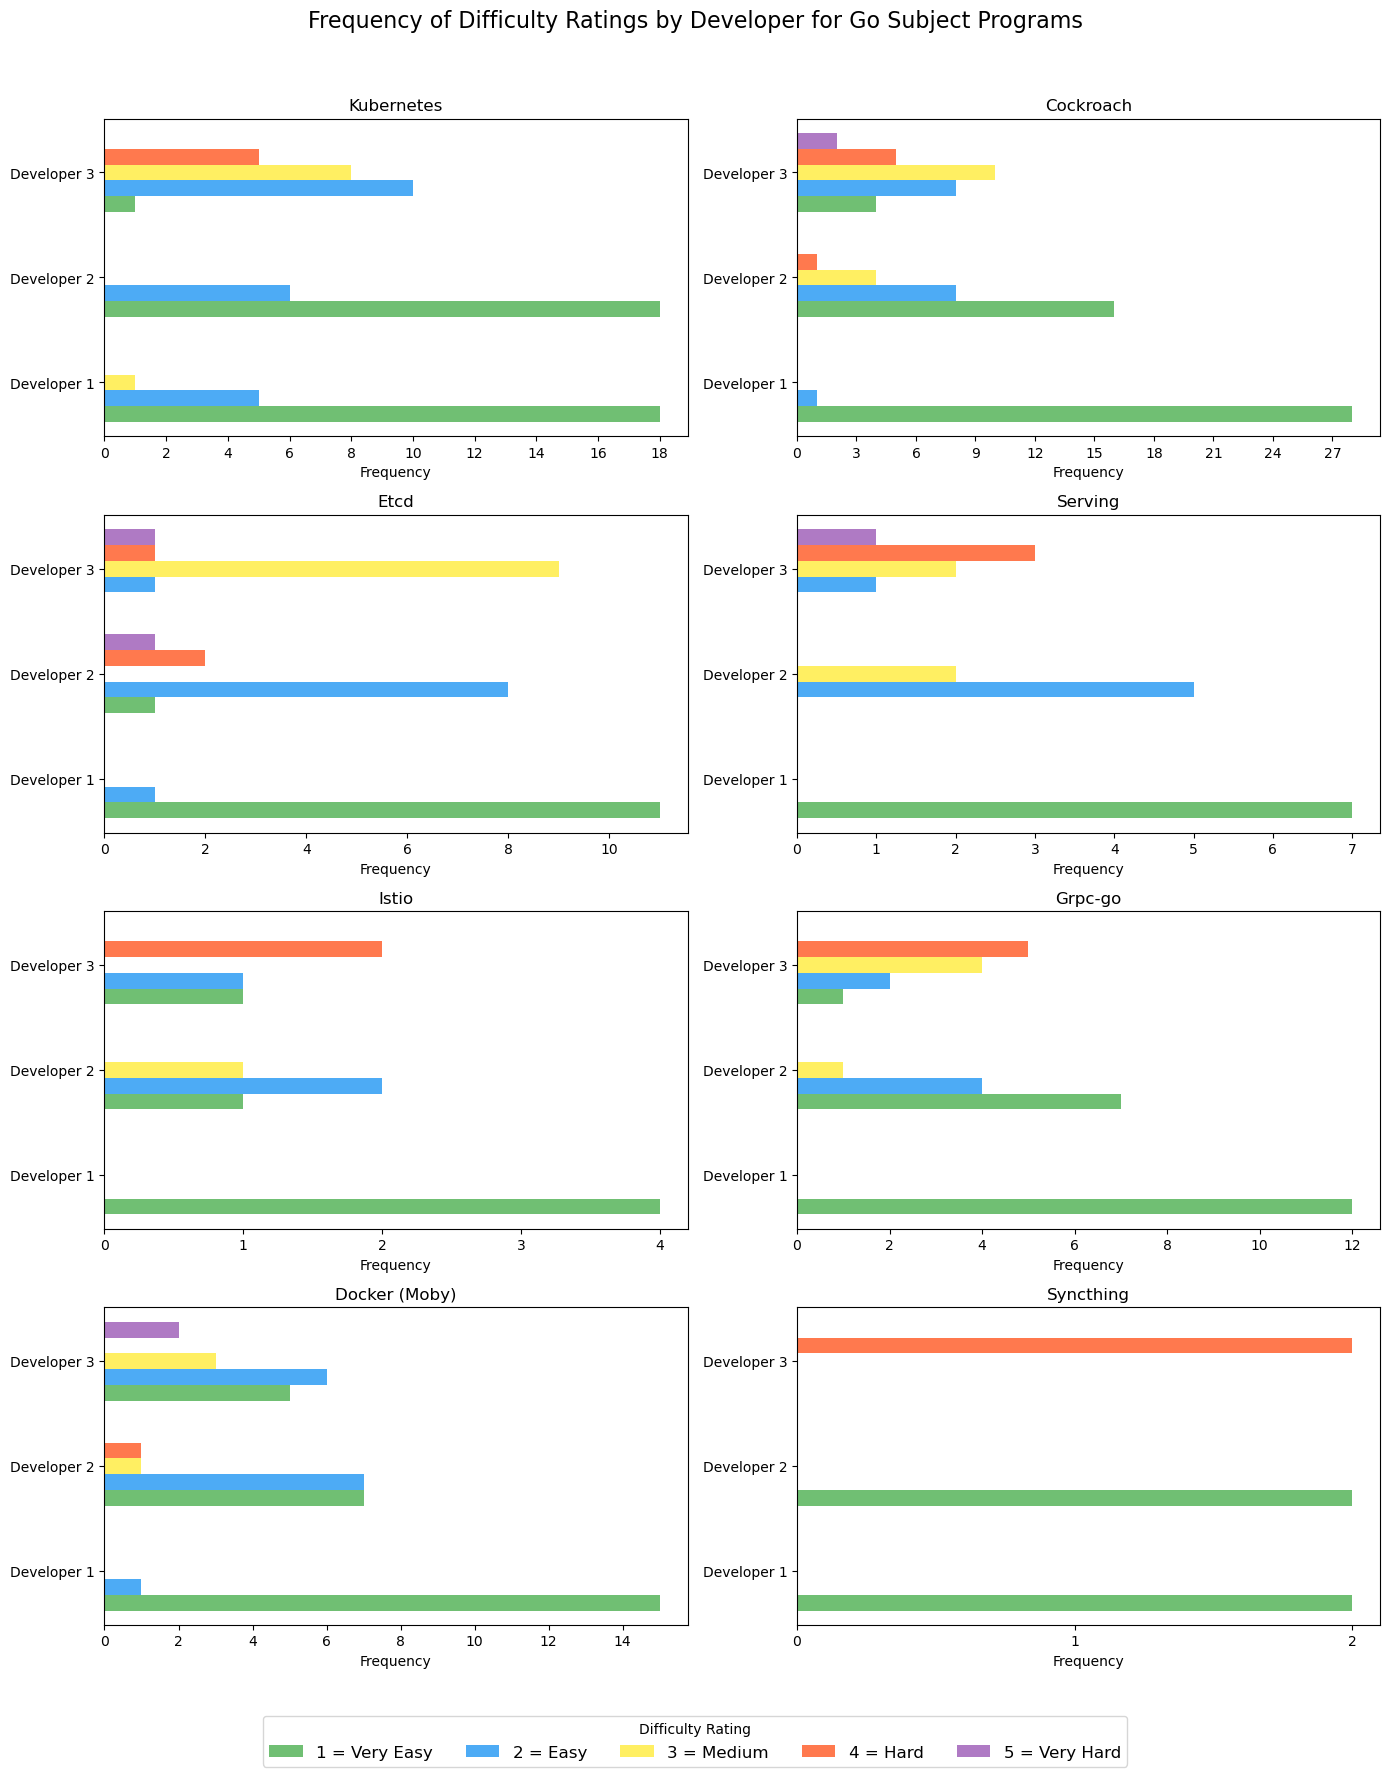

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/tongjie/Downloads/GoRoutines-Test Classification.csv')
programs = {
    'Kubernetes': 24,
    'Cockroach': 30,
    'Etcd': 12,
    'Serving': 7,
    'Istio': 4,
    'Grpc-go': 12,
    'Docker (Moby)': 16,
    'Syncthing': 2
}
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.suptitle('Frequency of Difficulty Ratings by Developer for Go Subject Programs', fontsize=16)
axes = axes.flatten()

def plot_program_ratings(program_name, ax):
    program_columns = [col for col in df.columns if program_name in col and 'rate the degree of difficulty' in col]
    program_data = df[program_columns]
    program_data_cleaned = program_data.apply(pd.to_numeric, errors='coerce')
    frequency_per_tester = program_data_cleaned.apply(lambda row: row.value_counts(), axis=1).fillna(0)
    for rating in range(1, 6):
        if rating not in frequency_per_tester.columns:
            frequency_per_tester[rating] = 0
    frequency_per_tester = frequency_per_tester[[1, 2, 3, 4, 5]]
    index = np.arange(len(frequency_per_tester))  
    bar_height = 0.15  
    opacity = 0.8  
    colors = ['#4caf50', '#2196f3', '#ffeb3b', '#ff5722', '#9b59b6']  
    for i, rating in enumerate(range(1, 6)):
        ax.barh(index + i * bar_height, frequency_per_tester[rating], bar_height, label=f'Rating {rating}', color=colors[i], alpha=opacity)
    ax.set_title(f'{program_name}', fontsize=12)
    ax.set_xlabel('Frequency')
    ax.set_yticks(index + 2 * bar_height)
    ax.set_yticklabels([f'Developer {i+1}' for i in range(len(frequency_per_tester))])
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

for i, (program_name, test_count) in enumerate(programs.items()):
    plot_program_ratings(program_name, axes[i])
legend_labels = ['1 = Very Easy', '2 = Easy', '3 = Medium', '4 = Hard', '5 = Very Hard']
fig.legend(legend_labels, loc='lower center', ncol=5, fontsize=12, title='Difficulty Rating')
plt.tight_layout(rect=[0, 0.05, 1, 0.96])  
plt.show()